In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider
%matplotlib inline

# Working with Probability Distributions

Most common probability distributions are contained in the `scipy stats` module.

## The Binomial Distribution

For example, if we want to work with the binomial distribution, we can use:

In [10]:
from scipy.stats import binom

For calculating probabilties of a specific number of successes, we can use the `pmf` function. Note that pmf stands for "probability mass function".

To find the probability of exactly 7 successes, we need to specify the following arguments:
* k: desired number of successes
* n: total number of trials
* p: probability of success

In [11]:
binom.pmf(k = 7, n = 10, p = 0.5)

0.11718750000000014

If we want the probability of 6 or 7 successes:

In [12]:
binom.pmf(k = 6, n = 10, p = 0.5) + binom.pmf(k = 7, n = 10, p = 0.5)

0.32226562500000033

If we want to find the probability of $x$ _or fewer_ successes, we can use the cumulative distribution fuction, or cdf. For example, to find the probability of 7 or fewer coins landing on heads, we can use

In [13]:
binom.cdf(k = 7, n = 10, p = 0.5)

0.9453125

If we want between 4 and 6, inclusive:

In [14]:
binom.cdf(k = 6, n = 10, p = 0.5) - binom.cdf(k = 3, n = 10, p = 0.5)

0.65625

For 5 or more:

In [15]:
1 - binom.cdf(k = 4, n = 10, p = 0.5)

0.6230468749999999

## The Normal Distribution

If we are going to work with normal distributions, we can import `norm` from `scipy.stats`.

In [ ]:
from scipy.stats import norm

In [18]:
@interact(mu = FloatSlider(value = 0, min = -3, max = 3, step = 0.1),
         sigma = FloatSlider(value = 1, min = 0.1, max = 3, step = 0.1))
def normal_pdf(mu, sigma):
    x = np.arange(start = -4, stop = 4, step = 0.01)
    plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
    plt.fill_between(x, norm.pdf(x, loc = mu, scale = sigma))
    plt.hlines(y = 0, xmin = -4, xmax = 4, color = 'black')
    plt.ylabel('Density')
    plt.title('Normal Distribution\n $\mu$ = {}, $\sigma$= {}'.format(mu, sigma))
    plt.xlim(-4, 4);

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

For calculating probabilities with the normal distribution, we will usually need to use its cdf.

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is less than 80?

Recall that the cdf tells the probability that the random variable is $x$ or less.

When using the `cdf` or `pdf` for a normal distribution, we need to specify the value(s) of $x$ along with
* loc: the mean
* scale: the standard deviation

In [20]:
norm.cdf(x = 80, loc = 100, scale = 10)

0.022750131948179195

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is more than 85 but less than 115?

To answer this, we need to do our trick with subtracting two areas. Remember that the cdf only tells the probability of a particular value or less.

In [21]:
norm.cdf(x = 115, loc = 100, scale = 10) - norm.cdf(x = 85, loc = 100, scale = 10)

0.8663855974622838

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is more than 90?

Again, we need to do the subtraction trick.

In [22]:
1 - norm.cdf(x = 90, loc = 100, scale = 10)

0.8413447460685429

### Using the Normal Distribution to Estimate Probabilities

The dataset NHANES_heights_weights.csv contains a sample of participants in the National Health and Nutrition Examination Survey. Specifically, it contains the heights and weights of all male participants between the ages of 30 and 40.

In [25]:
nhanes = pd.read_csv('../data/NHANES_heights_weights.csv')

In [26]:
nhanes.head()

,SEQN,weight_kg,height_cm,age,gender
0,83856.0,89.1,181.5,30.0,male
1,83863.0,95.8,175.6,35.0,male
2,83910.0,73.2,178.9,37.0,male
3,83931.0,78.7,174.0,37.0,male
4,84011.0,119.6,178.2,32.0,male


We can get a quick glimpse at the characteristics of the dataset using the `.describe()` method.

In [28]:
nhanes.height_cm.describe()

count    446.000000
mean     174.223767
std        7.770183
min      149.600000
25%      169.300000
50%      174.500000
75%      179.300000
max      193.800000
Name: height_cm, dtype: float64

To get a better idea of the distribution of values, we can look at a distplot.

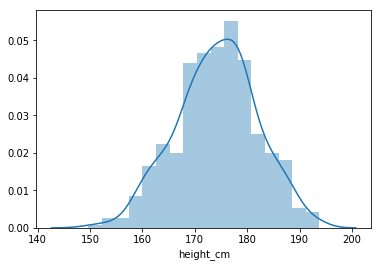

In [30]:
sns.distplot(nhanes.height_cm);

We can see that the data is roughly bell-shaped. There are some statistical tests which can be used to check whether a sample appears to have come from a normal distribution. 

Another option is to use what's called a **quantile-quantile plot**, or **Q-Q plot**. This type of plot can be used to assess whether it is plausible that a set of observations came from a particular distribution.

Specifically, a Q-Q plot is a scatterplot which shows the theoretical quantiles from the candidate distribution against the observed quantiles from the sample. If the plot is close to the identity plot (the diagonal line), then we can conclude that it is plausible (but not certain) that the sample came from that distribution. We'll use the following function to create our Q-Q plots. We just need to pass in the column of interest.

In [31]:
from nssstats.plots import qq_plot

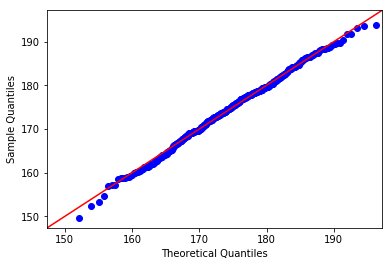

In [32]:
qq_plot(nhanes.height_cm)

We can see that, we just a few exceptions, the sample data hugs the diagonal line. We are probably safe to model the overall distribution using a normal distribution.

We'll approximate the population distribution using a normal distribution with the same mean and standard deviation as our sample.

In [33]:
mu = np.mean(nhanes.height_cm)
sigma = np.std(nhanes.height_cm)

print('mu = {}'.format(mu))
print('sigma = {}'.format(sigma))

mu = 174.22376681614358
sigma = 7.7614674413081355


Let's take a look at our hypothetical normal distribution against the sample data.

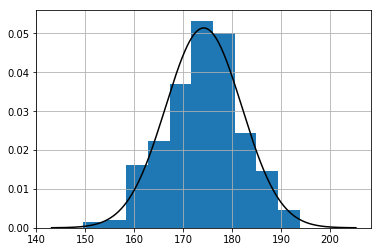

In [34]:
x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)
plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
nhanes.height_cm.hist(density = True);

We can see that it's not a perfect fit, but is reasonably close.

Using this distribution, we can make predictions about the overall population.

What proportion of 30 - 40 year-old males will be under 5 feet tall (152.4 cm)?

In [35]:
norm.cdf(152.4, loc = mu, scale = sigma)

0.0024631845766146664

What proportion of 30 - 40 year-old males will be over 6 feet tall (182.88 cm)?

In [37]:
1 - norm.cdf(182.88, loc = mu, scale = sigma)

0.13236457043542738

What proportion of 30 - 40 year-old males will be over 7 feet tall (213.36 cm)?

In [39]:
1 - norm.cdf(213.36, loc = mu, scale = sigma)

2.298939648648357e-07

What about weights?

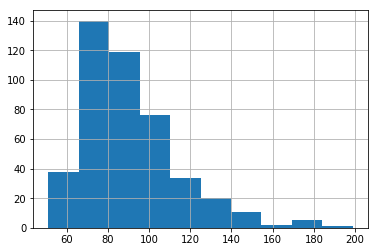

In [40]:
nhanes.weight_kg.hist();

It appears that weights are skewed to the right.

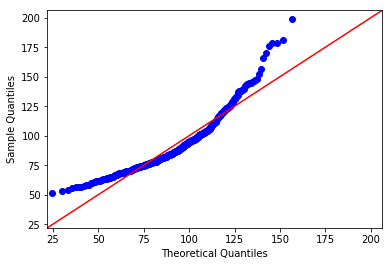

In [42]:
qq_plot(nhanes.weight_kg)

We can also see this in the Q-Q plot. The values in both the upper and lower quantiles are way larger than would be expected from a normal distribution.

Distributions with a large tail on the right can sometimes be approximated with a normal distribution after transforming the values. A common transformation is the logarithm.

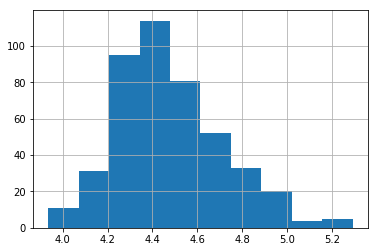

In [43]:
nhanes.weight_kg.apply(np.log).hist();

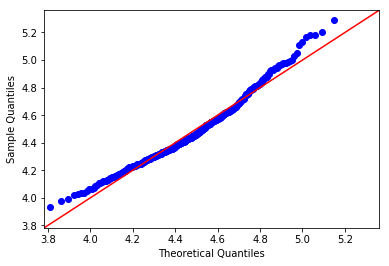

In [45]:
qq_plot(nhanes.weight_kg.apply(np.log))

It is still somewhat skewed to the right, but we are probably okay to make some estimates.

In [46]:
mu = np.mean(nhanes.weight_kg.apply(np.log))
sigma = np.std(nhanes.weight_kg.apply(np.log))

print('mu = {}'.format(mu))
print('sigma = {}'.format(sigma))

mu = 4.478150660412695
sigma = 0.23528831433228936


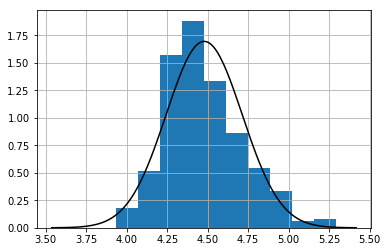

In [47]:
x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)
plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
nhanes.weight_kg.apply(np.log).hist(density = True);

What proportion of males between the age of 30 and 40 do we expect to weight less than 100 lbs (45.3592 kg)?

In [48]:
norm.cdf(np.log(45.3592), loc = mu, scale = sigma)

0.0024004005088118997

What proportion do we expect to weight more than 300 lbs (136.078 kg)?

In [49]:
1 - norm.cdf(np.log(136.078), loc = mu, scale = sigma)

0.03221985620600554